In [1]:
#! pip install --upgrade pip
#! pip install wordcloud
#! pip install gensim
#! pip install pywaffle
#! pip install keras
#! pip install tensorflow
#! pip install pyensae
#! pip install wikipedia
#! pip install --upgrade Pillow

In [2]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('genesis')
# nltk.download(‘wordnet')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
import os
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))
#stopwords

In [3]:
text = """Your professor Nistor Grozavu is member of the ETIS laboratory. ETIS laboratory consist of
5 teams and has 150 researchers. Nistor main research work is data mining and machine learning.
Machine Learning is also used in Text Mining and words researching. """

In [4]:
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['Your',
 'professor',
 'Nistor',
 'Grozavu',
 'is',
 'member',
 'of',
 'the',
 'ETIS',
 'laboratory',
 '.',
 'ETIS',
 'laboratory',
 'consist',
 'of',
 '5',
 'teams',
 'and',
 'has',
 '150',
 'researchers',
 '.',
 'Nistor',
 'main',
 'research',
 'work',
 'is',
 'data',
 'mining',
 'and',
 'machine',
 'learning',
 '.',
 'Machine',
 'Learning',
 'is',
 'also',
 'used',
 'in',
 'Text',
 'Mining',
 'and',
 'words',
 'researching',
 '.']

In [5]:
from nltk.probability import FreqDist
fdist1 = FreqDist(token).most_common(15)
fdist1

[('.', 4),
 ('is', 3),
 ('and', 3),
 ('Nistor', 2),
 ('of', 2),
 ('ETIS', 2),
 ('laboratory', 2),
 ('Your', 1),
 ('professor', 1),
 ('Grozavu', 1),
 ('member', 1),
 ('the', 1),
 ('consist', 1),
 ('5', 1),
 ('teams', 1)]

In [6]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("research")


'research'

In [7]:
stm = ["research", "researching", "researchers"]
for word in stm :
    print(word+ ":" +pst.stem(word))

word1 = "laboratory"
word2 = "consisting"
print(word1+ ":" +pst.stem(word1))
print(word2+ ":" +pst.stem(word2))


research:research
researching:research
researchers:research
laboratory:laboratori
consisting:consist


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("dependecies :", lemmatizer.lemmatize("dependecies"))
print("atomic :", lemmatizer.lemmatize("atomic"))
print("dissolved :", lemmatizer.lemmatize("dissolved"))
# No effects ?

rocks : rock
corpora : corpus
dependecies : dependecies
atomic : atomic
dissolved : dissolved


In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words("english"))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [10]:
text = "vote to choose a particular student or a group (party) to represent them in Cergy University Conseil"
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('student', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('Cergy', 'NN')]
[('University', 'NNP')]
[('Conseil', 'NN')]


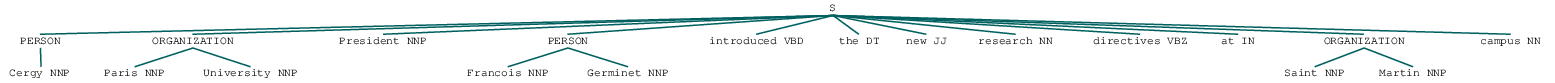

In [11]:
text = "Cergy Paris University President Francois Germinet introduced the new research directives at Saint Martin campus"
from nltk import ne_chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token) # list of tuples (word,TAG)
chunk = ne_chunk(tags) 
chunk

In [12]:
text = "We saw the yellow dog"
token = word_tokenize(text)
tags = nltk.pos_tag(token) 
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tags) 
print(result)

(S We/PRP saw/VBD (NP the/DT yellow/JJ dog/NN))


In [13]:
import os
if not os.path.exists('spooky.csv'):
    from pyensae.datasource import download_data
    download_data('spooky.csv',url='https://raw.githubusercontent.com/GU4243-ADS/spring2018-project1-ginnyqg/master/data/')
train = pd.read_csv('spooky.csv')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stopwords)
tfs = tfidf.fit_transform(train['text']) # sparse matrix of word frequency columns = vocabulary line = document
list(tfidf.vocabulary_.keys())[:10] + ['...']

['this',
 'process',
 'however',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 '...']

In [15]:
import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence','Computer science','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming',"Marathon"]
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Computer science
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Marathon
examine content


['Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [17]:
transformed_doc = tfidf.fit_transform(wiki_lst)
transformed_doc

<10x8671 sparse matrix of type '<class 'numpy.float64'>'
	with 16541 stored elements in Compressed Sparse Row format>

In [18]:
results = {"Clusters":[],"Silhouette":[],"Model":[]}
for k in range(2,10):
    model = KMeans(n_clusters=k,random_state=42,max_iter=200)
    preds = model.fit_predict(transformed_doc)
    results["Clusters"].append(k)
    results["Silhouette"].append(silhouette_score(transformed_doc, preds))
    results["Model"].append(model)

In [19]:
plt.style.use("default") # So we see no transparency behind tics and axis

#plt.style.use("dark_background") # negative to see on dark background white on black

#to modify directly matplotlib context manager
# import matplotlib as mpl

# mpl.rcParams["xtick.color"] ='red'
# mpl.rcParams["ytick.color"] ='green'
# mpl.rcParams["axes.edgecolor"] ='orange'

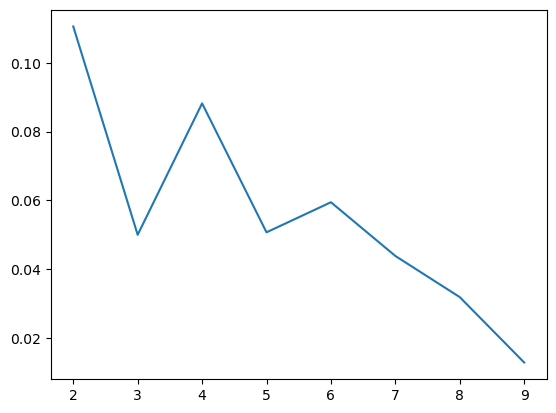

In [20]:
plt.plot(results["Clusters"],results["Silhouette"])

the best  number of clusters here is 3 

In [21]:
best_model = results["Model"][1]
n_clusters = results["Clusters"][1]
labels = best_model.predict(transformed_doc)

the european central bank (ecb) is the prime component of the eurosystem and the european system of central banks (escb) as well as one of seven institutions of the european union. it is one of the world's most important central banks. the ecb governing council makes monetary policy for the eurozone and the european union, administers the foreign exchange reserves of eu member states, engages in foreign exchange operations, and defines the intermediate monetary objectives and key interest rate of the eu. the ecb executive board enforces the policies and decisions of the governing council, and may direct the national central banks when doing so. the ecb has the exclusive right to authorise the issuance of euro banknotes. member states can issue euro coins, but the volume must be approved by the ecb beforehand. the bank also operates the target2 payments system. the ecb was established by the treaty of amsterdam in may 1999 with the purpose of guaranteeing and maintaining price stability

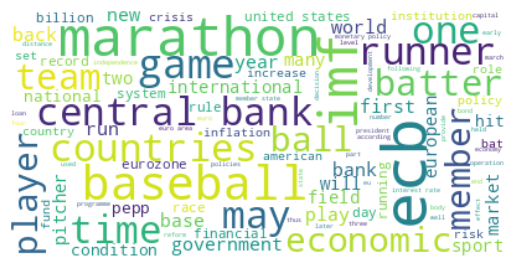

artificial intelligence (ai) is the intelligence of machines or software, as opposed to the intelligence of humans or other living beings. it is a field of study in computer science that develops and studies intelligent machines. such machines may be called ais. ai technology is widely used throughout industry, government, and science. some high-profile applications are: advanced web search engines (e.g., google search), recommendation systems (used by youtube, amazon, and netflix), interacting via human speech (such as google assistant, siri, and alexa), self-driving cars (e.g., waymo), generative and creative tools (chatgpt and ai art), and superhuman play and analysis in strategy games (such as chess and go).alan turing was the first person to conduct substantial research in the field that he called machine intelligence. artificial intelligence was founded as an academic discipline in 1956. the field went through multiple cycles of optimism followed by disappointment and loss of fun

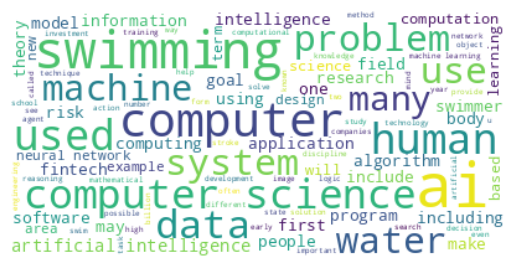

data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. it uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. however, data science is different from computer science and information science. turing award winner jim gray imagined data s

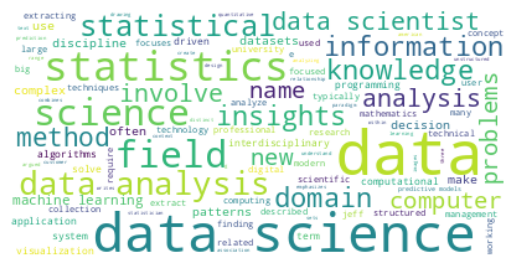

In [22]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,n_clusters):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    print(text)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()